In [3]:
#!pip install imageio

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [2]:
%matplotlib inline

In [3]:
original = imageio.v2.imread('IMG_5382.JPG')
original = original.astype(np.float32) / 255

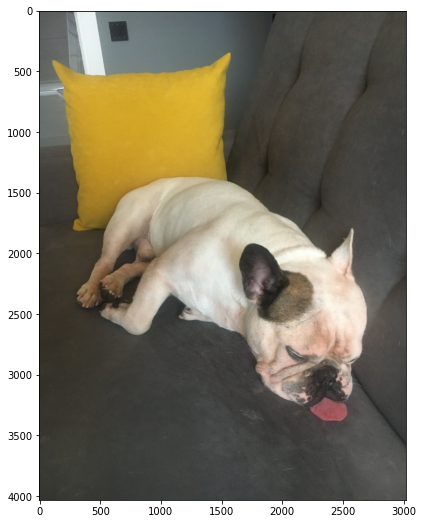

In [4]:
# оригинальное фото
plt.figure(figsize=(8,9))
plt.imshow(original);

In [105]:
b_original = original.copy()

In [106]:
# Бинаризация по порогу
def show_binary_image(image, thresholds:list):
    ''' Проверка длинны для красивого вывода, если число элементов списка нечетное,
    добавляем к последнему значению небольшое число'''
    thresh_len = len(thresholds)
    if thresh_len % 2 != 0:
        thresholds.append(thresholds[-1] + 0.05)
    binary = np.mean(image, axis=2)
    image_list = []
    for i in thresholds:
        image = np.where(binary > i, 1, 0).astype(np.uint8)
        image_list.append(image)
        
    
    for i in range(0, thresh_len, 2):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
        ax1.set_title(f'threshold {thresholds[i]}')  
        ax1.imshow(image_list[i])
        ax2.set_title(f'threshold {thresholds[i + 1]}')
        ax2.imshow(image_list[i+1])
    


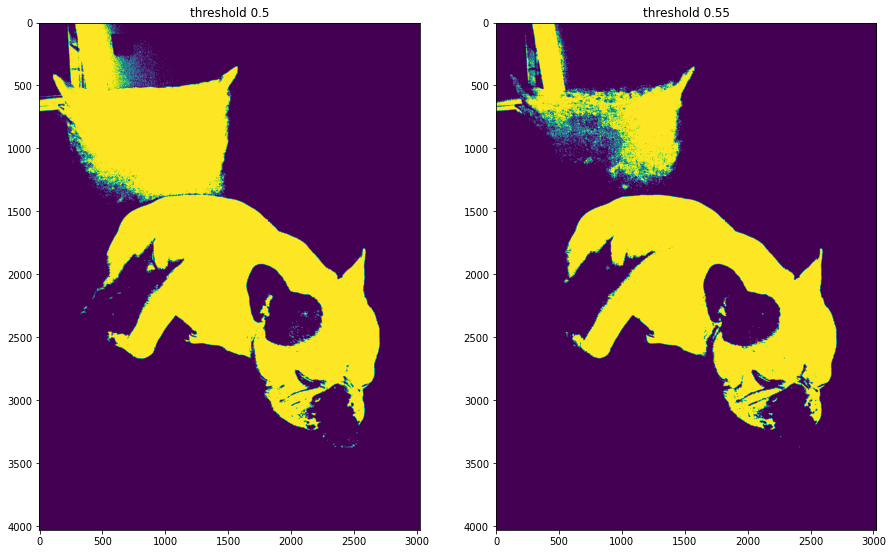

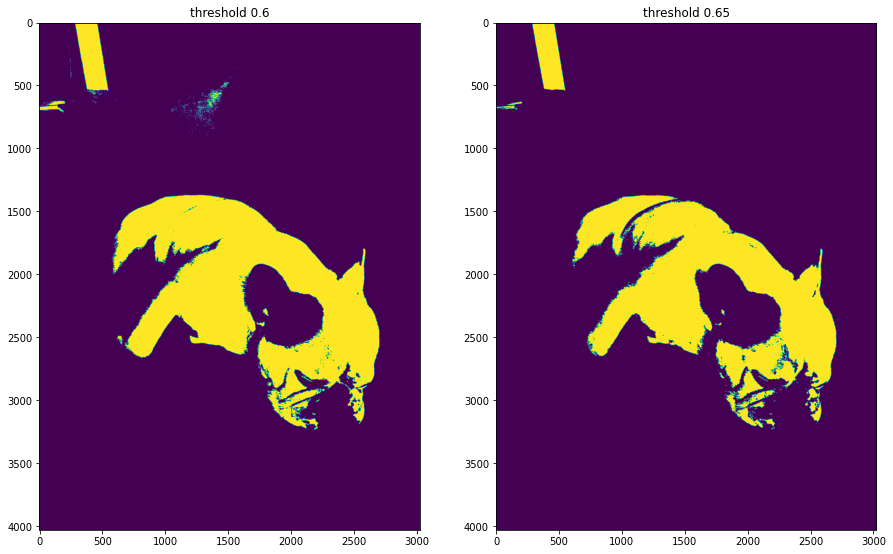

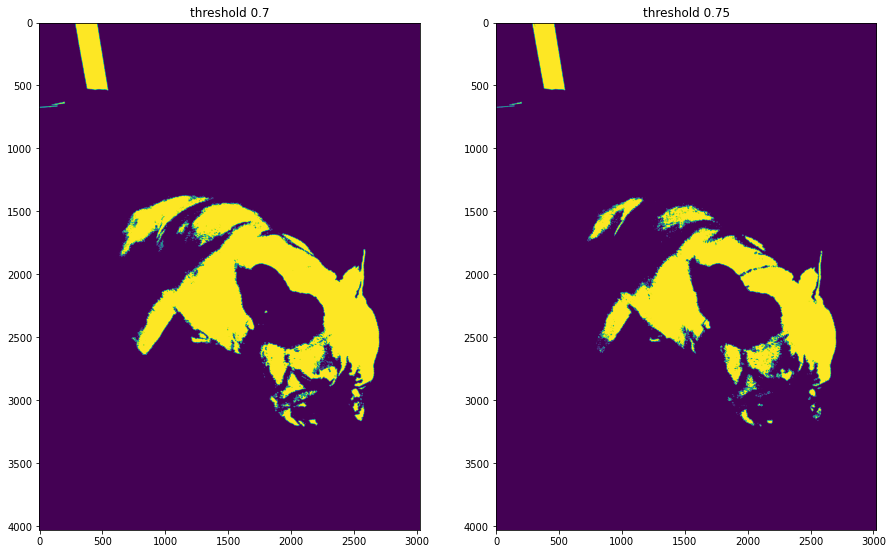

In [107]:
show_binary_image(b_original, [0.5, 0.55, 0.6, 0.65, 0.7])

In [110]:
original.shape

(4032, 3024, 3)

In [130]:
# свертка, но возвращаем не среднее, а минимум и максимум
def maximazer(x):
    return x.max()
def minimazer(x):
    return x.min()

In [146]:
def image(filter_size, image, main_function):
    filter_size = filter_size
    image_copy = image.copy()
    
    zero_image_1 = np.zeros(
        (original.shape[0] - filter_size[0] + 1,
        original.shape[1] - filter_size[1] + 1),
        dtype=np.float32
        )
    zero_image_2 = zero_image_1.copy()
    zero_image_3 = zero_image_1.copy()

    for el in range(zero_image_1.shape[0]):
        for i in range(zero_image_1.shape[1]):
            x = image_copy[el:el + filter_size[0],i: i + filter_size[1]]
            element = main_function(x)
            zero_image_1[el, i] = element
            
    for el in range(zero_image_2.shape[0]):
        for i in range(zero_image_2.shape[1]):
            x = image_copy[el:el + filter_size[0],i: i + filter_size[1]]
            element = main_function(x)
            zero_image_2[el, i] = element
            
    for el in range(zero_image_3.shape[0]):
        for i in range(zero_image_3.shape[1]):
            x = image_copy[el:el + filter_size[0],i: i + filter_size[1]]
            element = main_function(x)
            zero_image_3[el, i] = element
            
    return [zero_image_1, zero_image_2, zero_image_3]    


In [148]:
%%time
img = image((16, 16), original, minimazer)

CPU times: user 12min 11s, sys: 4.73 s, total: 12min 16s
Wall time: 12min 25s


In [161]:
minimazed = np.stack(img, axis=2)

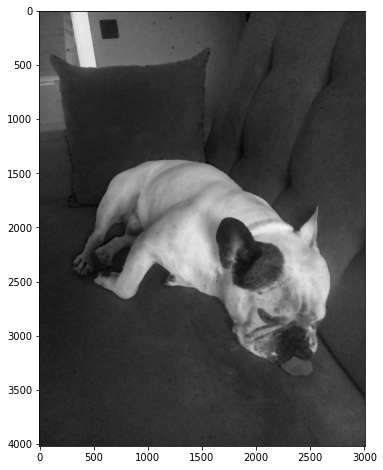

In [162]:
plt.figure(figsize=(10, 8))
plt.imshow(minimazed)

In [163]:
%%time
img = image((16, 16), original, maximazer)

CPU times: user 11min 57s, sys: 4.68 s, total: 12min 2s
Wall time: 12min 10s


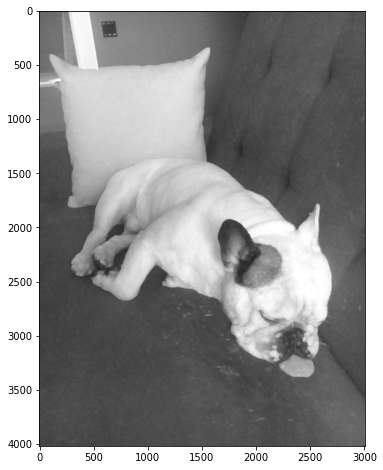

In [164]:
maximazed = np.stack(img, axis=2)
plt.figure(figsize=(10, 8))
plt.imshow(maximazed)